In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Regresión logistica simple

Un estudio quiere establecer un modelo que permita calcular la probabilidad de obtener una matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene.

In [28]:
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                         0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                         1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                         1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 1, 1])
matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                 51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                 63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                 63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                 50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                 57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                 72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                 57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                 56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                 58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                 53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                 63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                 53, 42, 60, 52, 38, 57, 58, 65])
datos = pd.DataFrame({'matricula_honor':matricula, 'nota_matematicas': matematicas})
datos.head()

,matricula_honor,nota_matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57


In [29]:
datos.shape

(200, 2)

In [30]:
datos.columns.values

In [31]:
datos['matricula_honor'].value_counts()

In [32]:
49/151

0.32450331125827814

In [33]:
datos.groupby('matricula_honor').mean()

,nota_matematicas
matricula_honor,
0,49.953642
1,60.938776


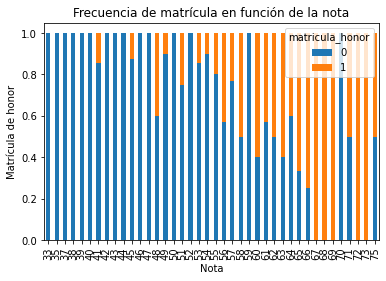

In [34]:
%matplotlib inline
table=pd.crosstab(datos.nota_matematicas, datos.matricula_honor)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Frecuencia de matrícula en función de la nota')
plt.xlabel('Nota')
plt.ylabel('Matrícula de honor')

In [35]:
X = datos['nota_matematicas']
Y = datos['matricula_honor']
modelo_logico = sm.Logit(Y,X)
resultado = modelo_logico.fit()

Optimization terminated successfully.
         Current function value: 0.598993
         Iterations 4


In [36]:
resultado.summary2()

Model: Logit Pseudo R-squared: -0.076 
 
 
 Dependent Variable: matricula_honor AIC: 241.5972 
 
 
 Date: 2022-03-25 11:56 BIC: 244.8956 
 
 
 No. Observations: 200 Log-Likelihood: -119.80 
 
 
 Df Model: 0 LL-Null: -111.36 
 
 
 Df Residuals: 199 LLR p-value: nan 
 
 
 Converged: 1.0000 Scale: 1.0000 
 
 
 No. Iterations: 4.0000 
 
 
 
 
 Coef. Std.Err. z P>|z| [0.025 0.975] 
 
 
 nota_matematicas -0.0172 0.0030 -5.8009 0.0000 -0.0230 -0.0114

In [37]:
X = datos[['nota_matematicas']]
modelo_logico = linear_model.LogisticRegression()
modelo_logico.fit(X,Y)

LogisticRegression()

In [38]:
modelo_logico.score(X,Y)

0.81

In [39]:
1-Y.mean()

0.755

In [40]:
Y.mean()

0.245

In [41]:
pd.DataFrame(list(zip(X.columns, np.transpose(modelo_logico.coef_))))

,0,1
0,nota_matematicas,[0.15623793750032888]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [43]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [44]:
probs = lm.predict_proba(X_test)
probs

In [45]:
prediction = lm.predict(X_test)
prediction

In [46]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.411539,1
1,0.027134,0
2,0.010697,0
3,0.010697,0
4,0.133106,1


In [47]:
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,29
1,31


In [48]:
25/len(prob_df)*100

41.66666666666667

In [51]:
metrics.accuracy_score(Y_test, prediction)

0.7333333333333333

In [53]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)
scores

In [54]:
scores.mean()

0.8

In [55]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)
Y_test

In [57]:
df = pd.DataFrame({
    'esp':espc_1,
    'sens':sensit
})
df.head()

,esp,sens
0,0.000000,0.000000
1,0.025641,0.047619
2,0.025641,0.095238
3,0.025641,0.285714
4,0.076923,0.380952


In [58]:
df.shape

(23, 2)

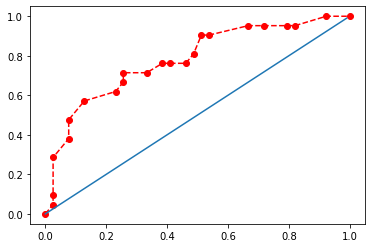

In [61]:
%matplotlib inline
plt.plot(espc_1,sensit, marker='o', linestyle='--', color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)